In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 833.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 40.4 MB/s eta 0:00:00
   ━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df1 = pd.read_excel("/content/도박,주식리딩방.xlsx")
df2 = pd.read_excel("/content/성매매등.xlsx")
df3 = pd.read_excel("/content/일반인.xlsx")
df4 = pd.read_excel("/content/임프레션 좀비.xlsx")

In [ ]:
## 개개인 정보를 행으로 가도록
df1 = df1.T
df2 = df2.T
df3 = df3.T
df4 = df4.T

In [ ]:
## 사용하지 않을 칼럼 삭제
df4 = df4.drop(df4.columns[[4, 6]], axis=1)

In [ ]:
df4 = df4.drop('이름', axis=0)

In [ ]:
df3 = df3.drop('이름', axis=0)

In [ ]:
df1.columns = ['아이디', '바이오', '팔로잉', '팔로워', '게시글 수']
df2.columns = ['아이디', '바이오', '팔로잉', '팔로워', '게시글 수']
df3.columns = ['아이디', '바이오', '팔로잉', '팔로워', '게시글 수']
df4.columns = ['아이디', '바이오', '팔로잉', '팔로워', '게시글 수']

In [ ]:
# 기존 인덱스를 '이름' 칼럼으로 변환 => 숫자로 설정
df1.insert(0, '이름', df1.index)
df1.reset_index(drop=True, inplace=True)

df2.insert(0, '이름', df2.index)
df2.reset_index(drop=True, inplace=True)

df3.insert(0, '이름', df3.index)
df3.reset_index(drop=True, inplace=True)

df4.insert(0, '이름', df4.index)
df4.reset_index(drop=True, inplace=True)

In [ ]:
df1.head()

,이름,아이디,바이오,팔로잉,팔로워,게시글 수
0,주주들,@yeouidopeople,여의도사람들의 투자정보 전용 플랫폼 주주들입니다! \n팔로우하세요🤘 \n트위터에서는...,29 팔로우 중,"8,146 팔로워",14000
1,페이스v,@faith_vvvv,빠르게 변화하는 시장 트렌드에 맞는 고급 정보 제공! 주체 세력의 1차 목표가 해석...,38 팔로우 중,15 팔로워,3
2,최부장,@choi1962,"작전, 세력의 심리조차 호재다! 급등의 마법사! 신들린 매매! 작전/세력 전문, 굵...",23 팔로우 중,34 팔로워,751
3,백전백승,@allday_win,"주주들을 위한 어플 ""주주들""에서 무료 주식정보 받아가세요~",62 팔로우 중,21 팔로워,14
4,주식왕,@kingstock77,"빠른 회전, 빠른 수익! 10년간 평균 투자 성공률 93%~94%",23 팔로우 중,64 팔로워,419


In [ ]:
# 숫자만 추출 (29 팔로우 중 => 29)
def extract_number(value):
    if pd.isna(value):
        return None
    return float(re.sub(r'\D', '', str(value)))

In [ ]:
## 숫자로 바꾸기 + 게시글 수, 아이디 에 값이 없는 경우 drop
df1['팔로잉'] = df1['팔로잉'].apply(extract_number)
df1['팔로워'] = df1['팔로워'].apply(extract_number)
df1 = df1.dropna(subset=['게시글 수'])
df1 = df1.dropna(subset=['아이디'])
df1.head()

,이름,아이디,바이오,팔로잉,팔로워,게시글 수
0,주주들,@yeouidopeople,여의도사람들의 투자정보 전용 플랫폼 주주들입니다! \n팔로우하세요🤘 \n트위터에서는...,29.0,8146.0,14000
1,페이스v,@faith_vvvv,빠르게 변화하는 시장 트렌드에 맞는 고급 정보 제공! 주체 세력의 1차 목표가 해석...,38.0,15.0,3
2,최부장,@choi1962,"작전, 세력의 심리조차 호재다! 급등의 마법사! 신들린 매매! 작전/세력 전문, 굵...",23.0,34.0,751
3,백전백승,@allday_win,"주주들을 위한 어플 ""주주들""에서 무료 주식정보 받아가세요~",62.0,21.0,14
4,주식왕,@kingstock77,"빠른 회전, 빠른 수익! 10년간 평균 투자 성공률 93%~94%",23.0,64.0,419


In [ ]:
df2['팔로잉'] = df2['팔로잉'].apply(extract_number)
df2['팔로워'] = df2['팔로워'].apply(extract_number)
df2 = df2.dropna(subset=['게시글 수'])
df2 = df2.dropna(subset=['아이디'])
df2.head()

,이름,아이디,바이오,팔로잉,팔로워,게시글 수
1,서울조건💕서울만남💕서울,@linda4577185860,지금 보실분연락주세요~ 이동 가능해요 라인 77kee,0.0,0.0,189
2,고양조건 고양만남 고양 고양섹트 고양오프 스타킹 고양ㅈㄱ,@donna4446723042,당분간 조건알바해요,0.0,0.0,85
3,\n🎗평택조건💕평택만남💕평택,@susan0722157940,만남 알바해요 라인: 23xs,0.0,2.0,557
8,안산 안산만남 안산조건 안산섹트 안산오프 대학생 검스 스타킹 ㅈㄱ,@kimberl92547664,라인: he7766,0.0,0.0,69
10,고양조건💕고양만남💕고양💕고양,@linda4542497679,이동 가능해요 라인 77kee,0.0,0.0,126


In [ ]:
df3['팔로잉'] = df3['팔로잉'].apply(extract_number)
df3['팔로워'] = df3['팔로워'].apply(extract_number)
df3 = df3.dropna(subset=['게시글 수'])
df3 = df3.dropna(subset=['아이디'])
df3.head()

,이름,아이디,바이오,팔로잉,팔로워,게시글 수
0,구름,@loveforclouds,It's an account that follows X's guidelines. f...,438.0,18.0,4610
1,로또,@cbancva,insta \n@cbancva\n #로또티디 #로또발색,129.0,2541.0,1485
2,운雲,@682hz,아디다스남 Insta-une.hz9,92.0,1644.0,4784
3,돋뽕,@DODBBONG,NaN,292.0,46.0,107000
4,"JET,BLACK",@JETBLACK0112,"/ 모든 데이터의 2차가공 및 상업적이용, 여성시대 등 이동금지, 트위터에서 봐주세요",15.0,44.0,5159


In [ ]:
df4['팔로잉'] = df4['팔로잉'].apply(extract_number)
df4['팔로워'] = df4['팔로워'].apply(extract_number)
df4 = df4.dropna(subset=['게시글 수'])
df4 = df4.dropna(subset=['아이디'])
df4.head()

,이름,아이디,바이오,팔로잉,팔로워,게시글 수
1,Ramesh sanatani,@RameshRame20540,NaN,2865.0,2502.0,40
2,Monika Gurjar,@MonikaGurjar199,You have to dream before your dreams can come ...,3474.0,5389.0,32000
3,gujjarlal,@gujjarlal225287,NaN,66.0,53.0,1685
4,saurabh yadav,@saurabh41639073,NaN,316.0,312.0,4574
6,Deepak mishra,@s_tripathi11,Nation comes first,195.0,746.0,7265


In [ ]:
## 예측을 위해 레이블링
df1['레이블'] = 0
df2['레이블'] = 1
df3['레이블'] = 2 # 일반인
df4['레이블'] = 3

In [ ]:
## bio가 na => 바이오를 적지 않은 경우여서 없음 으로 대체
df1['바이오'] = df1['바이오'].fillna("없음")
df2['바이오'] = df2['바이오'].fillna("없음")
df3['바이오'] = df3['바이오'].fillna("없음")
df4['바이오'] = df4['바이오'].fillna("없음")

In [ ]:
## 하나의 프레임으로 묶기
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

,이름,아이디,바이오,팔로잉,팔로워,게시글 수,레이블
0,주주들,@yeouidopeople,여의도사람들의 투자정보 전용 플랫폼 주주들입니다! \n팔로우하세요🤘 \n트위터에서는...,29.0,8146.0,14000,0
1,페이스v,@faith_vvvv,빠르게 변화하는 시장 트렌드에 맞는 고급 정보 제공! 주체 세력의 1차 목표가 해석...,38.0,15.0,3,0
2,최부장,@choi1962,"작전, 세력의 심리조차 호재다! 급등의 마법사! 신들린 매매! 작전/세력 전문, 굵...",23.0,34.0,751,0
3,백전백승,@allday_win,"주주들을 위한 어플 ""주주들""에서 무료 주식정보 받아가세요~",62.0,21.0,14,0
4,주식왕,@kingstock77,"빠른 회전, 빠른 수익! 10년간 평균 투자 성공률 93%~94%",23.0,64.0,419,0


In [ ]:
from sklearn.utils import shuffle
from collections import Counter

In [ ]:
# 데이터프레임 셔플
df = shuffle(df, random_state=42).reset_index(drop=True)

In [ ]:
df['게시글 수'] = pd.to_numeric(df['게시글 수'], errors='coerce')

In [ ]:
# '바이오' 컬럼에서 NaN 제거 후 문자열 변환
text_data = ' '.join(df['바이오'].dropna().astype(str))  # 모든 값을 문자열(str)로 변환

# 특수 문자 제거 (단어만 남기기)
text_data = re.sub(r'[^\w\s]', '', text_data)

# 단어 분할 (공백 기준)
words = text_data.split()

# 단어 빈도수 계산
word_counts = Counter(words)

# 데이터프레임 변환
word_freq_df = pd.DataFrame(word_counts.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False)

word_freq_df

,단어,빈도
7,없음,148
412,입니다,25
210,ह,24
294,and,24
400,서비스합니다,23
...,...,...
1344,세후,1
1345,100억과,1
1347,돌쇠를,1
1348,원했을,1


In [ ]:
filtered_word_freq_df = word_freq_df[word_freq_df['빈도'] >= 5]
filtered_word_freq_df['단어'].unique()

array(['없음', '입니다', 'ह', 'and', '서비스합니다', 'httpgoldbar92com', '주소는',
       '안전하게', '및', '오늘도', '모든', 'the', '접속', 'follow', '라인', 'is',
       '즐기세요', 'a', '이제는', '사장님들에게', 'back', 'of', 'l', 'for', 'my', '계정',
       'to', 'DM', '도메인', '100', 'on', '있는', '포인트', '건승하시고요', 'in', '수',
       'lover', '지인', 'I', 'you', '안', '게임', '재미있게', '받아가세요', '대박', 'क',
       '높은', '잘', '내', '팔로우', '믿음으로', '해외선물', 'are', '쉽게', 'Follow',
       '보답하겠습니다', '에서', '안전하고', '마세요', 'X', '다양한', '걱정하지', '홈페이지',
       'httpupst49com', '카카오톡', 'upstk', '상담전화', '07082855584', '궁금하신',
       '정확한', '점', '고객센터문의', '수수료', '환영', 'म', 'ㄹr인yn1339', '내가', '체결',
       '안전거래', 'your', '투자자들도', 'account', '문의', '안전선물거래업체', '투자의', '시작은',
       '업스톡', '초보', '이용할', '없애고', '하이로우', 'HTS', '선물거래의', '투자', '있습니다',
       '장벽은', '많이', '다', '더보이즈', '본인', '지급합니다', '찾으시는', '주식', '저희',
       '사이트에서', '사이트', '건승하세요', '실시간', '현금', '1만', 'not', 'by', '바이비트',
       '거래소', 'B', '연공계', '그', '매일', '수익', 'A', '증거금', '안녕하세요', 'जय',
     

In [ ]:
keyword_categories = {
    "성매매 관련": ["연공", "사진", "합성", "지인", "본인", "프본", "거래", "조건", "만남", "ㅈㄱ", "능욕", "얼싸", "ㅇㄴ", "취저", "여돌"],
    "SNS 계정 요구": ["ㄹr인", "디엠", "라인", "텔그", "카카오톡", "dm", "DM"],
    "Follow": ["follow", "Follow", "팔로우"],
    "투자 관련": ["해외선물", "투자자", "안전선물거래업체", "주식", "서비스합니다", "게임", "사장님들에게", "안전", "즐기세요"],
    "외국": ["ह", "क", "Social", "Indian", "lover"],
    "홈페이지 접속": ["http", "주소는", "안전하게", "접속", "수익", "홈페이지"]
}

# 카테고리별 단어 빈도 계산하여 새로운 칼럼 추가
for category, words in keyword_categories.items():
    df[category] = df['바이오'].astype(str).apply(lambda x: sum(len(re.findall(fr'\b{word}\b', x, re.IGNORECASE)) for word in words))

df.head()

,이름,아이디,바이오,팔로잉,팔로워,게시글 수,레이블,성매매 관련,SNS 계정 요구,Follow,투자 관련,외국,홈페이지 접속
0,사회 부적응자,@sibalguys,사회가 날 적응 하지 못함,4.0,3.0,251,2,0,0,0,0,0,0
1,кαѕн,@koffeex__,NO DM !!,289.0,1242.0,16000,3,0,2,0,0,0,0
2,윰,@helloaein,없음,2.0,1725.0,4,1,0,0,0,0,0,0
3,율,@YUL_0426,'*•.¸♡ 빙글빙글돌아가는뉴의하루 ♡¸.•*',119.0,3154.0,63000,2,0,0,0,0,0,0
4,채원♥️ (연능계),@sla__v__e,연능계에요! 프본,6.0,1045.0,29,1,1,0,0,0,0,0


# 모델링

In [ ]:
df_final = df.drop(['아이디', '바이오', '이름'], axis=1)
df_final.head()

,팔로잉,팔로워,게시글 수,레이블,성매매 관련,SNS 계정 요구,Follow,투자 관련,외국,홈페이지 접속
0,4.0,3.0,251,2,0,0,0,0,0,0
1,289.0,1242.0,16000,3,0,2,0,0,0,0
2,2.0,1725.0,4,1,0,0,0,0,0,0
3,119.0,3154.0,63000,2,0,0,0,0,0,0
4,6.0,1045.0,29,1,1,0,0,0,0,0


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # CPU

from pycaret.classification import *

clf_setup = setup(data=df_final, target='레이블', session_id=42)
best_model = compare_models()

,Description,Value
0,Session id,42
1,Target,레이블
2,Target type,Multiclass
3,Original data shape,"(831, 10)"
4,Transformed data shape,"(831, 10)"
5,Transformed train set shape,"(581, 10)"
6,Transformed test set shape,"(250, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8487,0.9479,0.8487,0.8581,0.8486,0.7882,0.7908,0.1810
rf,Random Forest Classifier,0.8436,0.9517,0.8436,0.8516,0.8420,0.7810,0.7843,0.2330
gbc,Gradient Boosting Classifier,0.8315,0.0000,0.8315,0.8393,0.8305,0.7645,0.7678,0.6150
lightgbm,Light Gradient Boosting Machine,0.8159,0.9426,0.8159,0.8225,0.8150,0.7432,0.7461,0.6470
xgboost,Extreme Gradient Boosting,0.8143,0.9414,0.8143,0.8236,0.8140,0.7404,0.7433,0.1680
dt,Decision Tree Classifier,0.7833,0.8495,0.7833,0.7907,0.7834,0.6994,0.7015,0.0320
ada,Ada Boost Classifier,0.7765,0.0000,0.7765,0.7977,0.7755,0.6901,0.6963,0.1510
lr,Logistic Regression,0.7731,0.0000,0.7731,0.8049,0.7706,0.6815,0.6898,1.1730
knn,K Neighbors Classifier,0.7127,0.8825,0.7127,0.7225,0.7105,0.6009,0.6052,0.0570
ridge,Ridge Classifier,0.6302,0.0000,0.6302,0.7441,0.5997,0.4528,0.5139,0.0310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_auc_score

# 데이터 분할
X = df_final.drop('레이블', axis=1)
y = df_final['레이블']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Optuna
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    # 모델 생성
    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1
    )

    # cross_val_predict를 사용하여 OOF 확률 예측 수행
    y_proba = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba", n_jobs=-1)

    # 다중 클래스 AUC-ROC 점수 계산
    auc_roc = roc_auc_score(y_train, y_proba, multi_class="ovr")

    return auc_roc

# Optuna 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, n_jobs=-1)

best_params = study.best_params
print("Best hyperparameters:", best_params)


[I 2025-03-05 13:27:50,999] A new study created in memory with name: no-name-7d1ba948-28ec-4e4d-a48f-aaeff2dacd69
[I 2025-03-05 13:27:59,587] Trial 1 finished with value: 0.9436031819082813 and parameters: {'n_estimators': 106, 'max_depth': 18, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.9436031819082813.
[I 2025-03-05 13:28:00,716] Trial 0 finished with value: 0.927897819485495 and parameters: {'n_estimators': 404, 'max_depth': 36, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 1 with value: 0.9436031819082813.
[I 2025-03-05 13:28:00,996] Trial 2 finished with value: 0.9308289499279613 and parameters: {'n_estimators': 54, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.9436031819082813.
[I 2025-03-05 13:28:06,120] Trial 4 finished with value: 0.9166302321050234 an

Best hyperparameters: {'n_estimators': 366, 'max_depth': 33, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}


In [ ]:
# 모델 학습
best_model = ExtraTreesClassifier(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)

# 성능 평가
y_proba_test = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_proba_test, multi_class="ovr")

print(f"Test AUC-ROC: {roc_auc:.4f}")

Test AUC-ROC: 0.9601


In [ ]:
y_proba_test

array([[4.45489322e-03, 2.10131796e-02, 9.50782361e-01, 2.37495664e-02],
       [3.07118876e-02, 2.71902908e-01, 6.06251383e-01, 9.11338216e-02],
       [9.74518491e-02, 2.84056166e-01, 5.20699758e-01, 9.77922267e-02],
       [8.67709249e-03, 8.75550527e-03, 5.28221664e-02, 9.29745236e-01],
       [2.34803065e-03, 2.32595301e-01, 6.74477200e-01, 9.05794680e-02],
       [2.92663948e-02, 3.87075377e-01, 4.98891228e-01, 8.47669994e-02],
       [1.41076209e-03, 2.43486844e-02, 7.94317954e-01, 1.79922600e-01],
       [1.58858370e-02, 6.39325762e-03, 4.35552456e-02, 9.34165660e-01],
       [2.75528690e-01, 2.21463283e-01, 1.42224602e-01, 3.60783426e-01],
       [4.19371206e-02, 1.67340943e-01, 7.59899110e-01, 3.08228259e-02],
       [1.39551443e-01, 3.29838035e-04, 4.08797118e-02, 8.19239008e-01],
       [1.67475663e-02, 9.67706686e-01, 1.45204067e-02, 1.02534078e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36468155e-01, 6.47849901e-01, 2.05772456e

In [ ]:
import pickle

with open("model.pkl", "wb") as file:
    pickle.dump(best_model, file)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
)

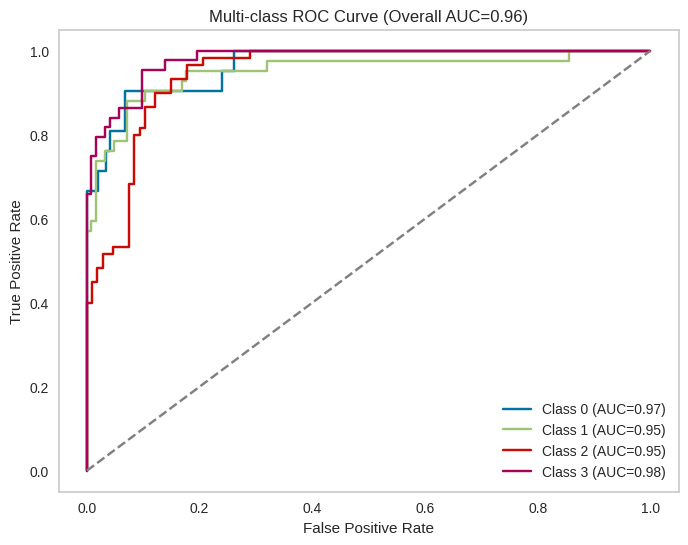

In [ ]:
# 예측
y_proba_test = best_model.predict_proba(X_test)

# 시각화
plt.figure(figsize=(8, 6))
n_classes = y_proba_test.shape[1]
auc_scores = []

# 클래스별
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba_test[:, i])
    auc_score = roc_auc_score(y_test == i, y_proba_test[:, i])
    auc_scores.append(auc_score)

    plt.plot(fpr, tpr, label=f'Class {i} (AUC={auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# 평균
overall_auc = roc_auc_score(y_test, y_proba_test, multi_class="ovr")
plt.title(f'Multi-class ROC Curve (Overall AUC={overall_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
## 저장된 모델 불러와서 결과 출력 확인
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

sample_input = X_test.iloc[:1]

y_proba = loaded_model.predict_proba(sample_input)
y_proba

array([[0.00445489, 0.02101318, 0.95078236, 0.02374957]])